In [ ]:
!pip install yfinance
!pip install pandas
!pip install requests
!pip install bs4
!pip install plotly

# **Question 1 - Extracting Tesla Stock Data Using yfinance**

In [46]:
import yfinance as yf
tesla = yf.Ticker("TSLA")

In [48]:
import yfinance as yf
import pandas as pd
import requests
!pip install lxml
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [49]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
tesla_history = tesla.history(period="15y")  # Retrieve 15 year of historical data


In [50]:
bottom_5 = tesla_history.tail()
print("Last 5 days of data")
print(bottom_5)



Last 5 days of data
                                 Open        High         Low       Close  \
Date                                                                        
2024-10-22 00:00:00-04:00  217.309998  218.220001  215.259995  217.970001   
2024-10-23 00:00:00-04:00  217.130005  218.720001  212.110001  213.649994   
2024-10-24 00:00:00-04:00  244.679993  262.119995  242.649994  260.480011   
2024-10-25 00:00:00-04:00  256.010010  269.489990  255.320007  269.190002   
2024-10-28 00:00:00-04:00  270.000000  273.540009  262.239990  262.510010   

                              Volume  Dividends  Stock Splits  
Date                                                           
2024-10-22 00:00:00-04:00   43268700        0.0           0.0  
2024-10-23 00:00:00-04:00   80938900        0.0           0.0  
2024-10-24 00:00:00-04:00  204491900        0.0           0.0  
2024-10-25 00:00:00-04:00  161611900        0.0           0.0  
2024-10-28 00:00:00-04:00  107093500        0.0         

Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [62]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text
# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'
# Step 4: Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Step 5: Find the relevant table (assuming it's the second one, as you mentioned)
tables = soup.find_all("table")
revenue_table = tables[1]  # Index 1 for the Tesla Revenue table
# Step 6: Check for the Tesla Quarterly Revenue Table
# Now we can iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Use pd.concat to append data
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)
# Step 7: Clean the Revenue column to remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)
# Step 8: Remove null or empty strings in the Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
# Step 9: Display the last five rows of the tesla_revenue DataFrame
print(tesla_revenue.tail())

<>:33: SyntaxWarning: invalid escape sequence '\$'
<>:33: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rhodri.owens\AppData\Local\Temp\ipykernel_12908\438128921.py:33: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


Question 3




Question 3 - Extracting GameStop Stock Data Using yfinance 

In [145]:

import yfinance as yf
#  ticker symbol of GameStop is GME
gamestop = yf.Ticker('GME')

# extracting stock information
gme_data=gamestop.history(period='15y')

#reset the index
gme_data.reset_index(inplace=True)
print (gme_data)

                          Date       Open       High        Low      Close  \
0    2009-10-29 00:00:00-04:00   4.110497   4.166045   4.076832   4.132380   
1    2009-10-30 00:00:00-04:00   4.115547   4.125646   4.041484   4.088615   
2    2009-11-02 00:00:00-05:00   4.115548   4.147529   4.007819   4.071783   
3    2009-11-03 00:00:00-05:00   4.049901   4.097032   3.979204   4.036435   
4    2009-11-04 00:00:00-05:00   4.085248   4.098714   3.987619   3.996036   
...                        ...        ...        ...        ...        ...   
3769 2024-10-22 00:00:00-04:00  20.620001  20.940001  20.430000  20.930000   
3770 2024-10-23 00:00:00-04:00  20.730000  20.980000  20.350000  20.540001   
3771 2024-10-24 00:00:00-04:00  20.629999  20.840000  20.480000  20.629999   
3772 2024-10-25 00:00:00-04:00  20.650000  21.430000  20.540001  20.570000   
3773 2024-10-28 00:00:00-04:00  20.840000  22.770000  20.730000  22.730000   

        Volume  Dividends  Stock Splits  
0     14058800       

Question 4 - Extracting GameStop Revenue Data Using Webscraping


In [17]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'
response = requests.get(url)
# Step 2: Save the text of the response as a variable named html_data
html_data = response.text
# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'
# Step 4: Create an empty DataFrame
Game_Stop_revenue = pd.DataFrame(columns=["Date", "Revenue"])
# Step 5: Find the relevant table (assuming it's the second one, as you mentioned)
tables = soup.find_all("table")
revenue_table = tables[1]  # Index 1 for the Game Stop Revenue
# Step 6: Check for the Game Stop Quarterly Revenue Table
# Now we can iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Use pd.concat to append data
        Game_Stop_revenue = pd.concat([Game_Stop_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)
# Step 7: Clean the Revenue column to remove commas and dollar signs
Game_Stop_revenue["Revenue"] = Game_Stop_revenue['Revenue'].str.replace(r',|\$', "", regex=True)
# Step 8: Remove null or empty strings in the Revenue column
Game_Stop_revenue = Game_Stop_revenue[Game_Stop_revenue['Revenue'] != ""]
# Step 9: 
print(Game_Stop_revenue)

          Date Revenue
0   2020-04-30    1021
1   2020-01-31    2194
2   2019-10-31    1439
3   2019-07-31    1286
4   2019-04-30    1548
..         ...     ...
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709

[62 rows x 2 columns]



Question 5 - Tesla Stock and Revenue Dashboard 

C:\Users\rhodri.owens\AppData\Local\anaconda3\Lib\site-packages\yfinance\utils.py:631: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


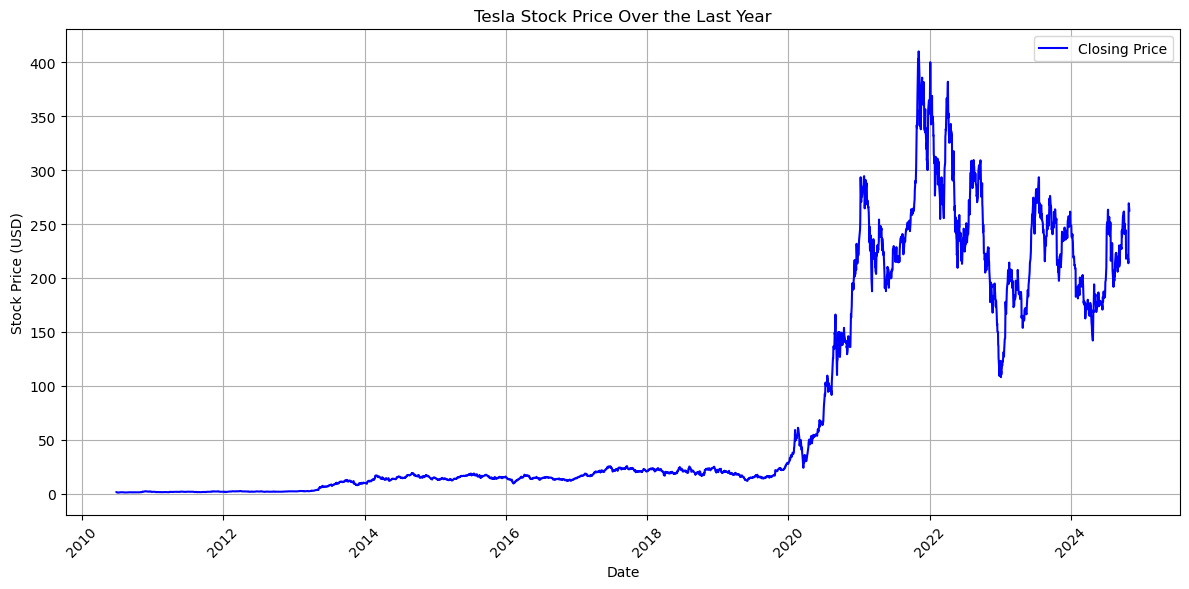

In [31]:
import matplotlib.pyplot as plt
# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="15y")  # Get data for the past year
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(tesla_data.index, tesla_data["Close"], label="Closing Price", color='b')
plt.title("Tesla Stock Price Over the Last Year")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\$'
<>:33: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rhodri.owens\AppData\Local\Temp\ipykernel_12908\1468764142.py:33: SyntaxWarning: invalid escape sequence '\$'
  tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)


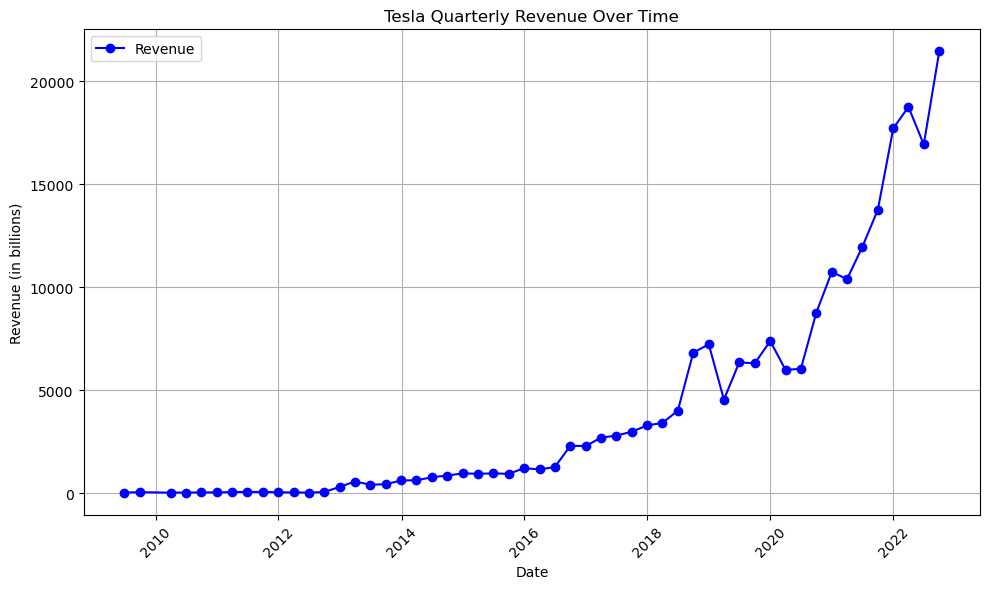

In [13]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text

# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'

# Step 4: Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Find the relevant table (assuming it's the second one, as you mentioned)
tables = soup.find_all("table")
revenue_table = tables[1]  # Index 1 for the Tesla Revenue table

# Step 6: Iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Append data to DataFrame
        tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)

# Step 7: Clean the Revenue column to remove commas and dollar signs
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Step 8: Convert Revenue to numeric and sort by Date
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors='coerce')
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"], errors='coerce')
tesla_revenue.dropna(inplace=True)  # Drop any rows where conversion failed
tesla_revenue.sort_values("Date", inplace=True)

# Step 9: Plot the revenue over time
plt.figure(figsize=(10, 6))
plt.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], marker='o', color='b', label="Revenue")
plt.title("Tesla Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in billions)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Question 6 - GameStop Stock and Revenue Dashboard

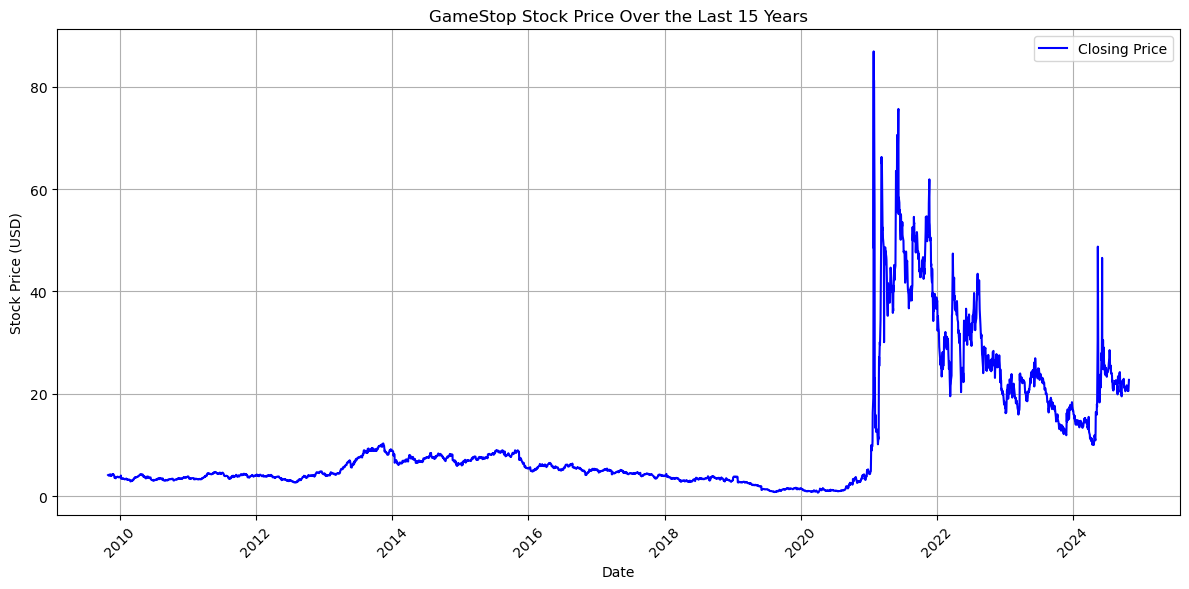

In [56]:
import yfinance as yf
import matplotlib.pyplot as plt
# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="15y")  # Get data for the past 15 years
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(gme_data.index, gme_data["Close"], label="Closing Price", color='b')
plt.title("GameStop Stock Price Over the Last 15 Years")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<>:33: SyntaxWarning: invalid escape sequence '\$'
<>:33: SyntaxWarning: invalid escape sequence '\$'
C:\Users\rhodri.owens\AppData\Local\Temp\ipykernel_12908\4083814221.py:33: SyntaxWarning: invalid escape sequence '\$'
  gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$', "", regex=True)


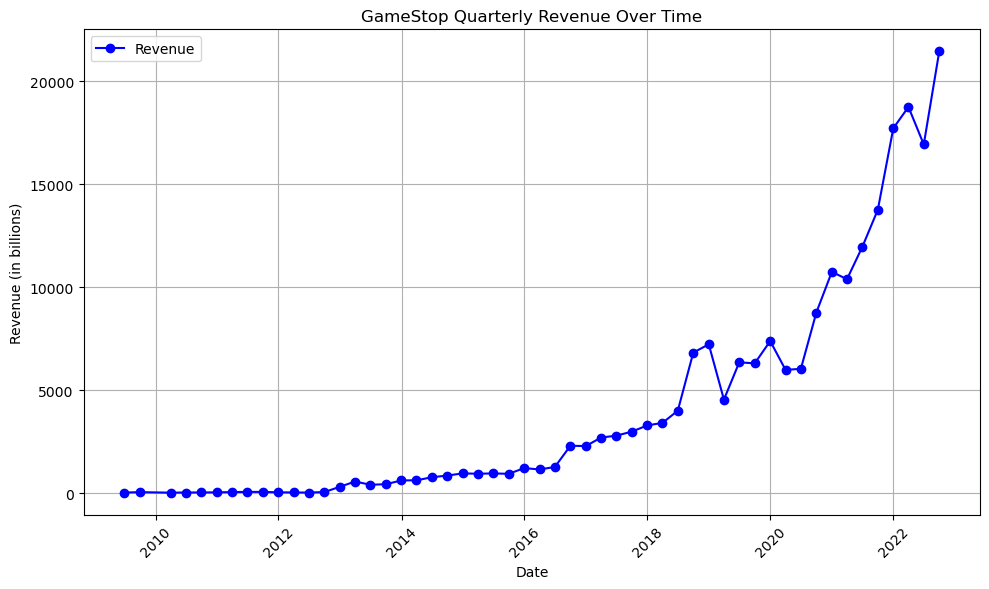

In [57]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Step 1: Use requests to download the webpage
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'
response = requests.get(url)

# Step 2: Save the text of the response as a variable named html_data
html_data = response.text

# Step 3: Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')  # You can also use 'html5lib'

# Step 4: Create an empty DataFrame
gamestop_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Find the relevant table (assuming it's the second one for GameStop revenue)
tables = soup.find_all("table")
revenue_table = tables[1]  # Adjust this index if necessary for GameStop

# Step 6: Iterate through rows in the table body
for row in revenue_table.tbody.find_all("tr"):
    cols = row.find_all("td")
    if cols:  # If there are columns in this row
        date = cols[0].text.strip()  # Get the date
        revenue = cols[1].text.strip()  # Get the revenue
        # Append data to DataFrame
        gamestop_revenue = pd.concat([gamestop_revenue, pd.DataFrame({'Date': [date], 'Revenue': [revenue]})], ignore_index=True)

# Step 7: Clean the Revenue column to remove commas and dollar signs
gamestop_revenue["Revenue"] = gamestop_revenue['Revenue'].str.replace(',|\$', "", regex=True)

# Step 8: Convert Revenue to numeric and sort by Date
gamestop_revenue["Revenue"] = pd.to_numeric(gamestop_revenue["Revenue"], errors='coerce')
gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"], errors='coerce')
gamestop_revenue.dropna(inplace=True)  # Drop any rows where conversion failed
gamestop_revenue.sort_values("Date", inplace=True)

# Step 9: Plot the revenue over time
plt.figure(figsize=(10, 6))
plt.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], marker='o', color='b', label="Revenue")
plt.title("GameStop Quarterly Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue (in billions)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()